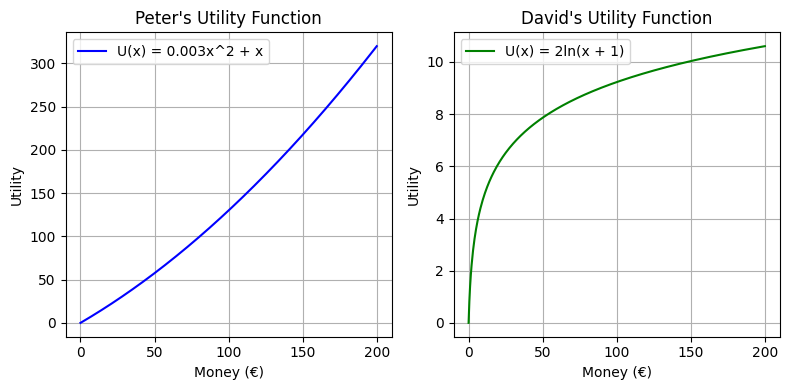

(0.00600000000000000, -2/(x + 1)**2)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols
x = sp.symbols('x')

# Peter's utility function and its second derivative
utility_peter = 0.003 * x**2 + x
second_derivative_peter = sp.diff(utility_peter, x, 2)

# David's utility function and its second derivative
utility_david = 2 * sp.log(x + 1)
second_derivative_david = sp.diff(utility_david, x, 2)

# Plotting the utility functions
x_values = np.linspace(0, 200, 400)
utility_peter_values = [utility_peter.subs(x, val) for val in x_values]
utility_david_values = [utility_david.subs(x, val) for val in x_values]

plt.figure(figsize=(8, 4))

# Plot for Peter
plt.subplot(1, 2, 1)
plt.plot(x_values, utility_peter_values, label="U(x) = 0.003x^2 + x", color="blue")
plt.title("Peter's Utility Function")
plt.xlabel("Money (€)")
plt.ylabel("Utility")
plt.grid(True)
plt.legend()

# Plot for David
plt.subplot(1, 2, 2)
plt.plot(x_values, utility_david_values, label="U(x) = 2ln(x + 1)", color="green")
plt.title("David's Utility Function")
plt.xlabel("Money (€)")
plt.ylabel("Utility")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

second_derivative_peter, second_derivative_david



### Lottery 1: Uniform between 10 and 100

In [2]:
import sympy as sp
import numpy as np
# Numerical solution

x = sp.symbols('x')

# Peter's utility function 
utility_peter = 0.003 * x**2 + x

# David's utility function 
utility_david = 2 * sp.log(x + 1)


a, b = 10, 100 
expected_utility_peter_lottery1 = sp.integrate(utility_peter, (x, a, b)) / (b - a)
expected_utility_david_lottery1 = sp.integrate(utility_david, (x, a, b)) / (b - a)

expected_utility_peter_lottery1 = expected_utility_peter_lottery1.evalf()
expected_utility_david_lottery1 = expected_utility_david_lottery1.evalf()

print("Expected utility of lottery 1 for Peter:", expected_utility_peter_lottery1)
print("Expected utility of lottery 1 for David:", expected_utility_david_lottery1)

Expected utility of lottery 1 for Peter: 66.1000000000000
Expected utility of lottery 1 for David: 7.77222942667078


In [3]:
# Peter's utility analytic integral: 0.001 x^3 + 0.5 x^2
# David's utility analytic integral: 2(x+1) ln(x+1)-2x

def integral_peter(x):
    return 0.001 * x**3 + 0.5 * x**2

def integral_david(x):
    return 2 * (x + 1) * np.log(x + 1) - 2 * x

expected_utility_peter_lottery1 = (integral_peter(b) - integral_peter(a)) / (b - a)
expected_utility_david_lottery1 = (integral_david(b) - integral_david(a)) / (b - a)

print("Expected utility of lottery 1 for Peter:", expected_utility_peter_lottery1)
print("Expected utility of lottery 1 for David:", expected_utility_david_lottery1)

Expected utility of lottery 1 for Peter: 66.1
Expected utility of lottery 1 for David: 7.77222942667078


In [15]:
import sympy as sp
import numpy as np
from scipy.optimize import newton

# Define the utility functions as numerical functions for solving
def utility_peter_num(x):
    return 0.003 * x**2 + x

def inverse_utility_peter_num(u):
    return -500/3 + 10.5409 * np.sqrt(3*u + 250)

def utility_david_num(x):
    return 2 * np.log(x + 1)

def inverse_utility_david_num(u):
    return np.exp(u / 2) - 1

# Function to numerically solve for the certainty equivalent
def find_certainty_equivalent(expected_utility, utility_function):
    # We use a numerical solver to find the root of the equation: utility(c) - expected_utility = 0
    ce = newton(lambda c: utility_function(c) - expected_utility, x0=50)  # Starting guess is 50
    return ce

# # Solve for the certainty equivalent for Peter and David for Lottery 1
# ce_peter_lottery1 = find_certainty_equivalent(expected_utility_peter_lottery1, utility_peter_num)
# ce_david_lottery1 = find_certainty_equivalent(expected_utility_david_lottery1, utility_david_num)

ce_peter_lottery1 = inverse_utility_peter_num(expected_utility_peter_lottery1)
ce_david_lottery1 = inverse_utility_david_num(expected_utility_david_lottery1)
# Risk Premium is the expected value of the lottery minus the CE
rp_peter_lottery1 = 55 - ce_peter_lottery1  # Expected value of Lottery 1 is 55 M€
rp_david_lottery1 = 55 - ce_david_lottery1

print("Certainty equivalent of lottery 1 for Peter:", ce_peter_lottery1)
print("Certainty equivalent of lottery 1 for David:", ce_david_lottery1)
print("Risk premium of lottery 1 for Peter:", rp_peter_lottery1)
print("Risk premium of lottery 1 for David:", rp_david_lottery1)


Certainty equivalent of lottery 1 for Peter: 56.516822397204294
Certainty equivalent of lottery 1 for David: 47.72122239690709
Risk premium of lottery 1 for Peter: -1.5168223972042938
Risk premium of lottery 1 for David: 7.278777603092912


### Lottery 2: Normal with mean 150 and standard deviation 25

In [5]:
# Parameters for Lottery 2
mean_lottery2 = 150
std_dev_lottery2 = 25
n_samples = 100000000  # Number of samples for the simulation

# Generate samples from the normal distribution
np.random.seed(0)  # For reproducibility
samples_lottery2 = np.random.normal(mean_lottery2, std_dev_lottery2, n_samples)

# Calculate utilities for each sample for Peter and David
utilities_peter_lottery2 = utility_peter_num(samples_lottery2)
utilities_david_lottery2 = utility_david_num(samples_lottery2)

# Calculate expected utilities by averaging
expected_utility_peter_lottery2 = np.mean(utilities_peter_lottery2)
expected_utility_david_lottery2 = np.mean(utilities_david_lottery2)

expected_utility_peter_lottery2, expected_utility_david_lottery2

print("Expected utility of lottery 2 for Peter:", expected_utility_peter_lottery2)
print("Expected utility of lottery 2 for David:", expected_utility_david_lottery2)

Expected utility of lottery 2 for Peter: 219.3772615645993
Expected utility of lottery 2 for David: 10.00593008338231


In [7]:
# Solve for the certainty equivalent for Peter and David for Lottery 2
ce_peter_lottery2 = find_certainty_equivalent(expected_utility_peter_lottery2, utility_peter_num)
ce_david_lottery2 = find_certainty_equivalent(expected_utility_david_lottery2, utility_david_num)

# Risk Premium is the expected value of the lottery minus the CE
expected_value_lottery2 = mean_lottery2  # Expected value of Lottery 2 is 150 M€
rp_peter_lottery2 = expected_value_lottery2 - ce_peter_lottery2
rp_david_lottery2 = expected_value_lottery2 - ce_david_lottery2

print("Certainty equivalent of lottery 2 for Peter:", ce_peter_lottery2)
print("Certainty equivalent of lottery 2 for David:", ce_david_lottery2)
print("Risk premium of lottery 2 for Peter:", rp_peter_lottery2)
print("Risk premium of lottery 2 for David:", rp_david_lottery2)


Certainty equivalent of lottery 2 for Peter: 150.986495811915
Certainty equivalent of lottery 2 for David: 147.85386333717648
Risk premium of lottery 2 for Peter: -0.986495811915006
Risk premium of lottery 2 for David: 2.1461366628235226


### Lottery 3: A discrete PDF with distribution as given in the below table

M€	0	10	20	30	40	50	60	70	80	90	100

Prob.	0.05	0.06	0.15	0.03	0.08	0.12	0.1	0.13	0.12	0.03	0.13

In [8]:
# Lottery 3 outcomes and probabilities
outcomes_lottery3 = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
probabilities_lottery3 = np.array([0.05, 0.06, 0.15, 0.03, 0.08, 0.12, 0.1, 0.13, 0.12, 0.03, 0.13])

# Calculate expected utilities for Peter and David for Lottery 3
expected_utility_peter_lottery3 = np.sum(utility_peter_num(outcomes_lottery3) * probabilities_lottery3)
expected_utility_david_lottery3 = np.sum(utility_david_num(outcomes_lottery3) * probabilities_lottery3)

print("Expected utility of lottery 3 for Peter:", expected_utility_peter_lottery3)
print("Expected utility of lottery 3 for David:", expected_utility_david_lottery3)

Expected utility of lottery 3 for Peter: 65.587
Expected utility of lottery 3 for David: 7.400675321604996


In [9]:
# Calculate the expected monetary value of Lottery 3
expected_value_lottery3 = np.sum(outcomes_lottery3 * probabilities_lottery3)

# Solve for the certainty equivalent for Peter and David for Lottery 3
ce_peter_lottery3 = find_certainty_equivalent(expected_utility_peter_lottery3, utility_peter_num)
ce_david_lottery3 = find_certainty_equivalent(expected_utility_david_lottery3, utility_david_num)

# Calculate the risk premiums for Peter and David for Lottery 3
rp_peter_lottery3 = expected_value_lottery3 - ce_peter_lottery3
rp_david_lottery3 = expected_value_lottery3 - ce_david_lottery3

ce_peter_lottery3, rp_peter_lottery3, ce_david_lottery3, rp_david_lottery3

print("Certainty equivalent of lottery 3 for Peter:", ce_peter_lottery3)
print("Certainty equivalent of lottery 3 for David:", ce_david_lottery3)
print("Risk premium of lottery 3 for Peter:", rp_peter_lottery3)
print("Risk premium of lottery 3 for David:", rp_david_lottery3)

Certainty equivalent of lottery 3 for Peter: 56.13394175061552
Certainty equivalent of lottery 3 for David: 39.46096413537205
Risk premium of lottery 3 for Peter: -2.0339417506155186
Risk premium of lottery 3 for David: 14.63903586462795


In [27]:
var_lottery1 = 10 + 0.1 * (100 - 10)
cvar_lottery1 = (var_lottery1 - 10) / 2 + 10

print("VaR of lottery 1:", var_lottery1)
print("CVaR of lottery 1:", cvar_lottery1)

VaR of lottery 1: 19.0
CVaR of lottery 1: 14.5


In [24]:
from scipy.stats import norm

# Lottery 2 parameters
mean_lottery2 = 150
std_dev_lottery2 = 25

# Z-score and PDF value for 10% confidence level
z_score = norm.ppf(0.1)
pdf_value = norm.pdf(z_score)

var_lottery2 = norm.ppf(0.1, mean_lottery2, std_dev_lottery2)
cvar_lottery2 = mean_lottery2 - std_dev_lottery2 * pdf_value / 0.1

print("VaR of lottery 2:", var_lottery2)
print("CVaR of lottery 2:", cvar_lottery2)


VaR of lottery 2: 117.96121086138498
CVaR of lottery 2: 106.12541701687829


In [29]:
outcomes_lottery3 = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
probabilities_lottery3 = np.array([0.05, 0.06, 0.15, 0.03, 0.08, 0.12, 0.1, 0.13, 0.12, 0.03, 0.13])

# Sorting the outcomes and probabilities together in ascending order of outcomes
sorted_indices = np.argsort(outcomes_lottery3)
sorted_outcomes = outcomes_lottery3[sorted_indices]
sorted_probabilities = probabilities_lottery3[sorted_indices]

print("Sorted outcomes:\n", sorted_outcomes)
print("Sorted probabilities:\n", sorted_probabilities)
# Calculate cumulative probabilities
cumulative_probs = np.cumsum(sorted_probabilities)

print("Cumulative probabilities:\n", cumulative_probs)
# Find the outcome where the cumulative probability exceeds 10% (for 10% VaR)
var_index = np.where(cumulative_probs >= 0.1)[0][0]
var_lottery3 = sorted_outcomes[var_index]
print("var_index:", var_index)
# Calculate CVaR as the average of outcomes worse than VaR
cvar_lottery3 = np.sum(sorted_outcomes[:var_index+1] * sorted_probabilities[:var_index+1]) / np.sum(sorted_probabilities[:var_index+1])

var_lottery3, cvar_lottery3

print("VaR of lottery 3:", var_lottery3)
print("CVaR of lottery 3:", cvar_lottery3)


Sorted outcomes:
 [  0  10  20  30  40  50  60  70  80  90 100]
Sorted probabilities:
 [0.05 0.06 0.15 0.03 0.08 0.12 0.1  0.13 0.12 0.03 0.13]
Cumulative probabilities:
 [0.05 0.11 0.26 0.29 0.37 0.49 0.59 0.72 0.84 0.87 1.  ]
var_index: 1
VaR of lottery 3: 10
CVaR of lottery 3: 5.454545454545454
